In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df2=pd.read_csv("D:\\DataScience_bootcamp\\titanic\\test.csv")
df1=pd.read_csv("D:\\DataScience_bootcamp\\titanic\\train.csv")
df3=pd.read_csv("D:\\DataScience_bootcamp\\titanic\\gender_submission.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
df3.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


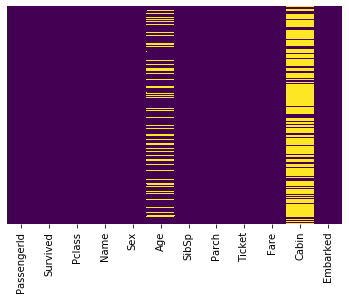

In [6]:
sns.heatmap(df1.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.show()

In [7]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

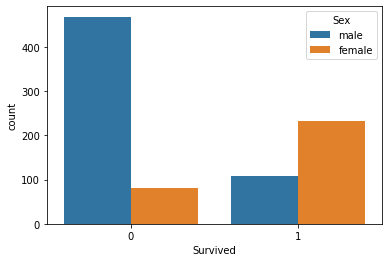

In [8]:
sns.countplot(x=df1["Survived"],hue=df1["Sex"])
plt.show()

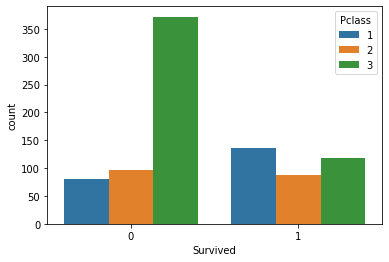

In [9]:
sns.countplot(x=df1["Survived"],hue=df1["Pclass"])
plt.show()

In [10]:
df1["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

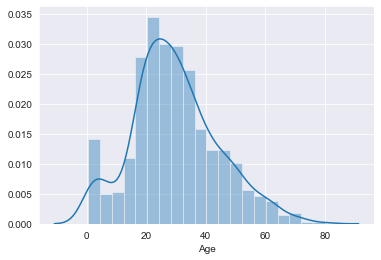

In [11]:
sns.set_style("darkgrid")
sns.distplot(a=df1["Age"].dropna())

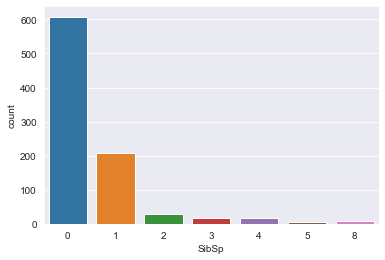

In [12]:
sns.countplot(x="SibSp",data=df1)

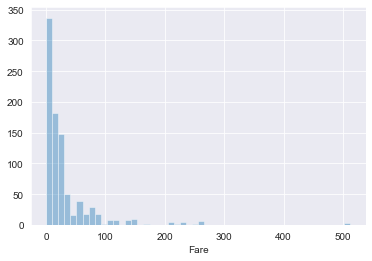

In [13]:
sns.distplot(a=df1["Fare"],kde=False)

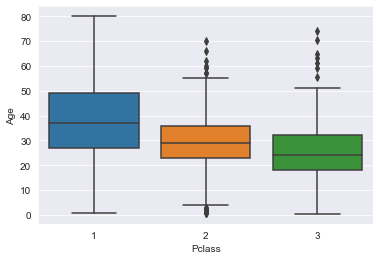

In [14]:
sns.boxplot(x="Pclass",y="Age",data=df1)

In [15]:
def input_age(age_class):
    age=age_class[0]
    Pclass=age_class[1]
    if pd.isnull(age):
        if Pclass==3:
            return 25
        elif Pclass==2:
            return 30
        else :
            return 38
    else:
        return age
        
    

In [16]:
Age=df1[["Age","Pclass"]].groupby(by=df1["Pclass"]).mean()

In [17]:
Age

,Age,Pclass
Pclass,,
1,38.233441,1
2,29.877630,2
3,25.140620,3


In [18]:
df1["Age"]=df1[["Age","Pclass"]].apply(input_age,axis=1)

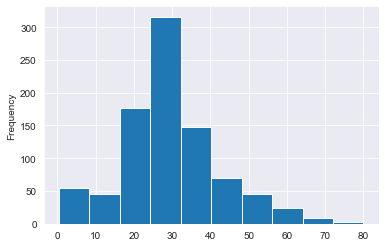

In [19]:
df1["Age"].plot(kind="hist")

In [20]:
df1.drop(labels="Cabin",axis=1,inplace=True)

In [21]:
df1.dropna(inplace=True)

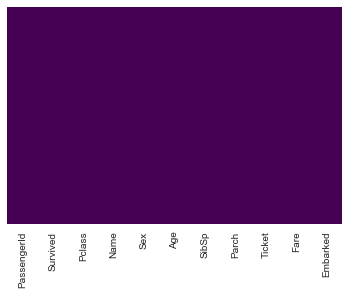

In [22]:
sns.heatmap(df1.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.show()

In [23]:
sex=pd.get_dummies(df1["Sex"],drop_first=True)

In [24]:
embarked=pd.get_dummies(df1["Embarked"],drop_first=True)

In [25]:
Pclass=pd.get_dummies(df1["Pclass"],drop_first=True)

In [26]:
df1=pd.concat([df1,sex,embarked,Pclass],axis=1)

In [27]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


### feature engineering of the name

In [28]:
def name_split(name):
    nam_split=name.split(",")[1]
    title=nam_split.split(".")[0]

    return title

In [29]:
title_name=df1["Name"].apply(name_split)

In [30]:
title_name=pd.DataFrame(title_name)

In [31]:
title_name.columns=["Title_name"]

In [32]:
df1=pd.concat([df1,title_name],axis=1)

In [33]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3,Title_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1,Mr


In [34]:
title_name_dummies=pd.get_dummies(data=df1["Title_name"])

In [35]:
title_name_dummies.drop(" Capt",axis=1,inplace=True)

In [36]:
title_name_dummies["Others"]=title_name_dummies[[' Don',' Jonkheer',' Lady',' Mlle',' Mme',' Rev',' Sir',' the Countess'," Col"," Major"]].sum(axis=1)

In [37]:
title_name_dummies.drop([' Don',' Jonkheer',' Lady',' Mlle',' Mme',' Rev',' Sir',' the Countess'," Col"," Major"],axis=1,inplace=True)

In [38]:
df1=pd.concat([df1,title_name_dummies],axis=1)

### train Set

In [39]:
train=df1.drop(["Sex","Embarked","Name","Ticket","PassengerId","Pclass","Title_name"],axis=1)

In [40]:
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Dr,Master,Miss,Mr,Mrs,Ms,Others
0,0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,1,0,0,0


In [41]:
train.describe()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3,Dr,Master,Miss,Mr,Mrs,Ms,Others
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.218414,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409,0.206974,0.552306,0.007874,0.044994,0.203600,0.581552,0.139483,0.001125,0.020247
std,0.486260,13.178017,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063,0.405365,0.497536,0.088435,0.207408,0.402901,0.493582,0.346644,0.033539,0.140925
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
X_train=train.drop(["Survived"],axis=1)
y_train=train["Survived"]

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lnm=LogisticRegression()

In [45]:
lnm.fit(X_train,y_train)

C:\Users\brvis\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### test data

In [46]:
Age=df2[["Age","Pclass"]].groupby(by=df2["Pclass"]).mean()

In [47]:
Age

,Age,Pclass
Pclass,,
1,40.918367,1
2,28.777500,2
3,24.027945,3


In [48]:
df2["Age"]=df2[["Age","Pclass"]].apply(input_age,axis=1)

In [49]:
df2.drop(labels="Cabin",axis=1,inplace=True)

In [50]:
df2=pd.concat([df2,df3["Survived"]],axis=1)

In [51]:
df2.groupby(by=["Pclass"]).mean()

,PassengerId,Age,SibSp,Parch,Fare,Survived
Pclass,,,,,,
1,1098.224299,40.672897,0.476636,0.383178,94.280297,0.467290
2,1117.935484,28.843226,0.376344,0.344086,22.202104,0.322581
3,1094.178899,24.348991,0.463303,0.417431,12.459678,0.330275


In [52]:
df2[pd.isnull(df2["Fare"])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S,0


In [53]:
df2.fillna(value=12.45,inplace=True)

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


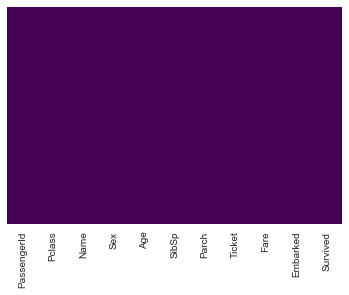

In [55]:
sns.heatmap(df2.isnull(),cbar=False,yticklabels=False,cmap="viridis")
plt.show()

In [56]:
sex_test=pd.get_dummies(df2["Sex"],drop_first=True)

In [57]:
embarked_test=pd.get_dummies(df2["Embarked"],drop_first=True)

In [58]:
Pclass_test=pd.get_dummies(df2["Pclass"],drop_first=True)

In [59]:
df2=pd.concat([df2,sex_test,embarked_test,Pclass_test],axis=1)

In [60]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S,2,3
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,0,1,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,0,0,1,0,1


### feature engineering of the name

In [61]:
title_name_test=df2["Name"].apply(name_split)

In [62]:
title_name_test=pd.DataFrame(title_name_test)

In [63]:
title_name_test.columns=["Title_name"]

In [64]:
df2=pd.concat([df2,title_name_test],axis=1)

In [65]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,male,Q,S,2,3,Title_name
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1,1,0,0,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0,0,1,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1,1,0,1,0,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1,0,1,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,0,0,1,0,1,Mrs


In [66]:
title_name_dummies_test=pd.get_dummies(data=df2["Title_name"])

In [67]:
title_name_dummies_test["Others"]=title_name_dummies_test[[' Dona',' Rev'," Col",]].sum(axis=1)

In [68]:
title_name_dummies_test.drop([' Dona',' Rev'," Col",],axis=1,inplace=True)

In [69]:
df2=pd.concat([df2,title_name_dummies_test],axis=1)

In [70]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,...,2,3,Title_name,Dr,Master,Miss,Mr,Mrs,Ms,Others
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,...,0,1,Mr,0,0,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,...,0,1,Mrs,0,0,0,0,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,...,1,0,Mr,0,0,0,1,0,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,...,0,1,Mr,0,0,0,1,0,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,...,0,1,Mrs,0,0,0,0,1,0,0


### test dataframe

In [71]:
X_test=df2.drop(["Sex","Embarked","Name","Ticket","PassengerId","Pclass","Title_name","Survived"],axis=1)

In [72]:
X_train.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Dr,Master,Miss,Mr,Mrs,Ms,Others
0,22.0,1,0,7.2500,1,0,1,0,1,0,0,0,1,0,0,0
1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,0,1,0,0,1,0,0,0,0
3,35.0,1,0,53.1000,0,0,1,0,0,0,0,0,0,1,0,0
4,35.0,0,0,8.0500,1,0,1,0,1,0,0,0,1,0,0,0


In [73]:
X_test.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3,Dr,Master,Miss,Mr,Mrs,Ms,Others
0,34.5,0,0,7.8292,1,1,0,0,1,0,0,0,1,0,0,0
1,47.0,1,0,7.0000,0,0,1,0,1,0,0,0,0,1,0,0
2,62.0,0,0,9.6875,1,1,0,1,0,0,0,0,1,0,0,0
3,27.0,0,0,8.6625,1,0,1,0,1,0,0,0,1,0,0,0
4,22.0,1,1,12.2875,0,0,1,0,1,0,0,0,0,1,0,0


In [74]:
y_test=df2["Survived"]

In [75]:
predictions=lnm.predict(X_test)

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       266
           1       0.90      0.95      0.93       152

    accuracy                           0.94       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.94      0.95       418



In [78]:
final_submission=pd.DataFrame(predictions)

In [79]:
final_submission.columns=["Survived"]

In [80]:
final_submission=pd.concat([df2["PassengerId"],final_submission],axis=1)

In [81]:
final_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
